In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from lightgbm import LGBMRegressor 
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from skgbm.xai import AXIL

# Dataset

In [28]:
#X, y = make_regression(n_samples=200)
#X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
# https://www.kaggle.com/datasets/sudalairajkumar/undata-country-profiles
df = pd.read_csv('archive/kiva_country_profile_variables.csv')

In [30]:
# https://medium.com/@chaimgluck1/working-with-pandas-fixing-messy-column-names-42a54a6659cd
df.columns = \
    df.columns.str.strip().str.lower() \
        .str.replace('\(.*\)', '') \
        .str.strip() \
        .str.replace(' ', '_') \
        .str.replace(',', '') \
        .str.replace('.', '') \
        .str.replace(':', '') 

/tmp/ipykernel_35977/1231718614.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns.str.strip().str.lower() \
/tmp/ipykernel_35977/1231718614.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns.str.strip().str.lower() \


In [31]:
df = df.replace({'~0': '0', '\.\.\.': np.nan}, regex=True)
df = df.iloc[:, :14]
df.iloc[:, 3:14] = df.iloc[:, 3:14].convert_dtypes(convert_string=True).astype(float)

In [32]:
df_medium = df.sample(frac=.5).reset_index()
df_small = df.sample(frac=.1).reset_index()

In [33]:
# df.convert_dtypes(convert_string=True).dtypes
# df.iloc[:, 2:14].convert_dtypes(convert_string=True).astype(float)

In [36]:
df_medium

,index,country,region,surface_area,population_in_thousands,population_density,sex_ratio,gdp_gross_domestic_product,gdp_growth_rate,gdp_per_capita,economy_agriculture,economy_industry,economy_services_and_other_activity,employment_agriculture,employment_industry
0,34,Kenya,EasternAfrica,591958,49700.0,87.3,98.8,63399.0,5.6,1376.7,32.0,19.0,49.0,61.9,8.6
1,29,India,SouthernAsia,3287263,1339180.0,450.4,107.6,2116239.0,7.6,1614.2,17.0,29.7,53.2,44.3,24.5
2,16,Congo,MiddleAfrica,342000,5261.0,15.4,100.1,8493.0,1.2,1838.1,4.7,70.0,25.3,40.7,25.8
3,71,Tanzania,EasternAfrica,947303,57310.0,64.7,97.8,45628.0,7.0,877.3,31.1,26.1,42.9,66.9,6.4
4,10,Burundi,EasternAfrica,27830,10864.0,423.1,96.9,2735.0,-4.1,244.6,36.3,13.9,49.8,91.1,2.6
5,77,Uganda,EasternAfrica,241550,42863.0,214.5,99.0,25282.0,5.4,647.7,25.6,21.5,52.9,72.0,7.4
6,14,China,EasternAsia,9600000,1409517.0,150.1,106.3,11158457.0,6.9,8109.1,9.2,41.1,49.7,27.0,23.9
7,66,Somalia,EasternAfrica,637657,14742.0,23.5,99.3,1559.0,2.7,144.5,60.2,7.4,32.5,72.0,4.8
8,30,Indonesia,South-easternAsia,1910931,263991.0,145.7,101.4,861934.0,4.8,3346.5,14.0,41.3,44.7,31.4,22.4
9,37,Lebanon,WesternAsia,10452,6082.0,594.6,100.6,50149.0,1.5,8571.4,3.2,19.6,77.2,8.2,22.4


In [37]:
TARGET = 'gdp_gross_domestic_product'
X, y, labels = df_medium.iloc[:, 3:6], df_medium[TARGET], df_medium.iloc[:, 1]

In [38]:
X_train, X_test, y_train, y_test , l_train, l_test = train_test_split(X, y, labels, test_size=.1)

# Training

AXIL only explains regressors. Additionaly, for the moment the only accepted loss function is RMSE and its variants (MSE etc.).

In [39]:
# gbm_reg = LGBMRegressor().fit(X_train, y_train)
# gbm_reg = GradientBoostingRegressor().fit(X_train, y_train)
# gbm_reg = CatBoostRegressor().fit(X_train, y_train)
gbm_reg = XGBRegressor(reg_lambda=0).fit(X_train, y_train)

# Fitting AXIL

In [40]:
axil = AXIL(gbm_reg)
axil.fit(X_train, y_train)

AXIL(estimator=XGBRegressor(base_score=None, booster=None, callbacks=None,
                            colsample_bylevel=None, colsample_bynode=None,
                            colsample_bytree=None, early_stopping_rounds=None,
                            enable_categorical=False, eval_metric=None,
                            feature_types=None, gamma=None, gpu_id=None,
                            grow_policy=None, importance_type=None,
                            interaction_constraints=None, learning_rate=None,
                            max_bin=None, max_cat_threshold=None,
                            max_cat_to_onehot=None, max_delta_step=None,
                            max_depth=None, max_leaves=None,
                            min_child_weight=None, missing=nan,
                            monotone_constraints=None, n_estimators=100,
                            n_jobs=None, num_parallel_tree=None, predictor=None,
                            random_state=None, ...))

In [41]:
k_test = axil.transform(X_test)
y_pred = gbm_reg.predict(X_test)
np.isclose(y_pred, k_test.T @ y_train, rtol=0.0001).all()

True

# Visualization

## Heatmap

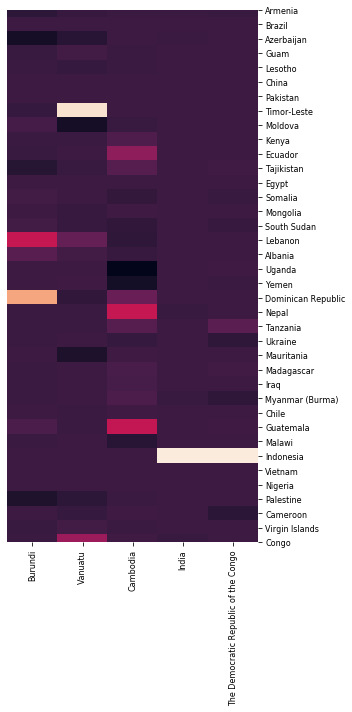

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 10]

plt.close()
ax = sns.heatmap(
    k_test, cbar=False,
    xticklabels=l_test, yticklabels=l_train
)
ax.yaxis.tick_right()
ax.set(ylabel=None)
ax.tick_params(axis='both', which='major', labelsize=8)
plt.yticks(rotation=0)
ax.figure.tight_layout()
plt.show()

## Clustermap

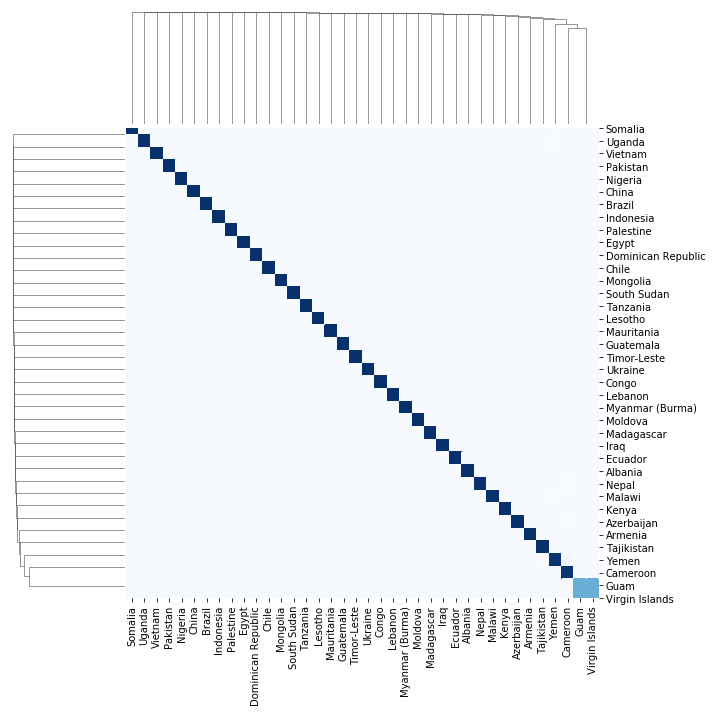

In [43]:
k_train = axil.transform(X_train)

import scipy.spatial as sp, scipy.cluster.hierarchy as hc
linkage = hc.linkage(k_train, method='average')
ax = sns.clustermap(k_train, row_linkage=linkage, 
                    col_linkage=linkage, 
                    cmap='Blues',
                    xticklabels=l_train, yticklabels=l_train,
                    cbar_pos=None)
#ax.figure.tight_layout()
ax.ax_heatmap.set_ylabel("")
plt.show()

## Network

In [15]:
import networkx as nx
plt.rcParams['figure.figsize'] = [10, 10]

X, y, labels = \
    df_small.iloc[:, 3:].drop(columns=TARGET), df_small[TARGET], df_small.iloc[:, 1]

# Fitting
gbm = XGBRegressor(reg_lambda=0).fit(X, y)
axil = AXIL(gbm).fit(X)
k_small = axil.transform(X)

graph = k_small.copy()

In [16]:
labels

0                             Armenia
1                              Malawi
2                  Dominican Republic
3                            Pakistan
4                             Vietnam
5                           Indonesia
6                     Solomon Islands
7    Saint Vincent and the Grenadines
8                             Nigeria
Name: country, dtype: object

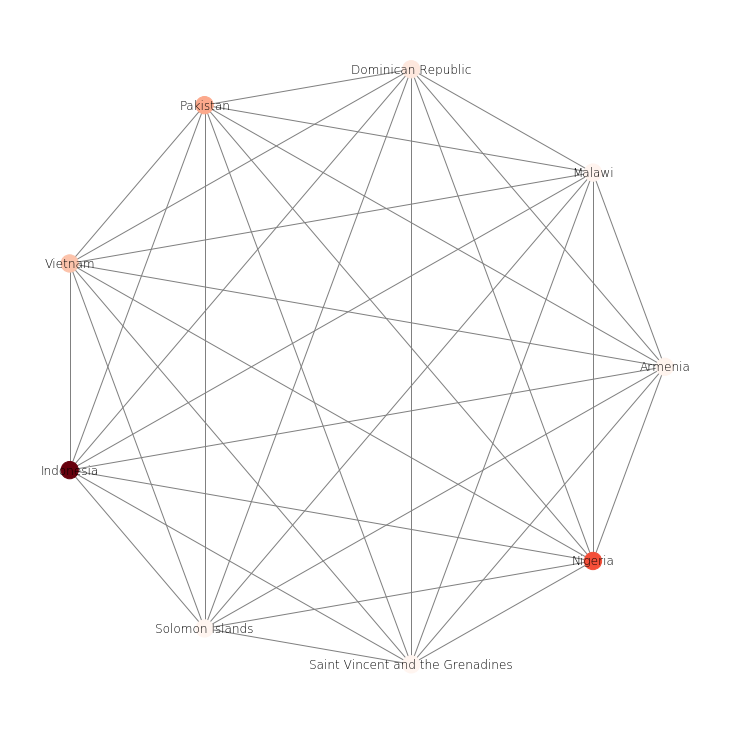

In [17]:
np.fill_diagonal(graph, 0)
G = nx.from_numpy_matrix(graph)
nx.draw_circular(
        G, with_labels=True, labels=labels.to_dict(), 
        font_weight='light', node_color = y.to_list(), 
        cmap="Reds", edge_color="gray"
)

In [18]:
gbm.feature_importances_

array([9.7838604e-01, 0.0000000e+00, 0.0000000e+00, 1.6320819e-15,
       2.1613952e-02, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00], dtype=float32)

In [19]:
gbm.feature_names_in_

array(['surface_area', 'population_in_thousands', 'population_density',
       'sex_ratio', 'gdp_growth_rate', 'gdp_per_capita',
       'economy_agriculture', 'economy_industry',
       'economy_services_and_other_activity', 'employment_agriculture',
       'employment_industry'], dtype='<U35')

In [20]:
df_small

,index,country,region,surface_area,population_in_thousands,population_density,sex_ratio,gdp_gross_domestic_product,gdp_growth_rate,gdp_per_capita,economy_agriculture,economy_industry,economy_services_and_other_activity,employment_agriculture,employment_industry
0,2,Armenia,WesternAsia,29743,2930.0,102.9,88.8,10529.0,3.0,3489.1,19.0,28.3,52.8,35.0,15.7
1,41,Malawi,EasternAfrica,118484,18622.0,197.5,98.2,6420.0,3.0,372.9,26.1,16.6,57.3,69.9,4.8
2,19,Dominican Republic,Caribbean,48671,10767.0,222.8,99.2,67103.0,7.0,6373.6,6.6,28.0,65.4,13.1,16.9
3,53,Pakistan,SouthernAsia,796095,197016.0,255.6,105.6,266458.0,5.5,1410.4,25.5,19.0,55.5,42.1,19.8
4,81,Vietnam,South-easternAsia,330967,95541.0,308.1,98.0,193241.0,6.7,2067.9,18.9,37.0,44.2,41.8,22.9
5,30,Indonesia,South-easternAsia,1910931,263991.0,145.7,101.4,861934.0,4.8,3346.5,14.0,41.3,44.7,31.4,22.4
6,65,Solomon Islands,Melanesia,28896,611.0,21.8,103.4,1075.0,3.2,1841.6,28.2,15.6,56.3,48.1,2.4
7,61,Saint Vincent and the Grenadines,Caribbean,389,110.0,281.8,101.7,738.0,1.6,6739.2,7.5,17.2,75.3,22.1,16.1
8,52,Nigeria,WesternAfrica,923768,190886.0,209.6,102.7,494583.0,2.7,2714.5,20.9,20.4,58.8,27.9,14.7
